<a href="https://colab.research.google.com/github/weslei-silva87/previsao-de-vendas-com-python/blob/main/previsao_de_vendas_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Projeto de Previsão de faturamento de Vendas
# Carregamento dos Dados
import pandas as pd

tabela = pd.read_csv('/content/advertising.csv')
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#Ajuste de Dados
print(tabela.info)

<bound method DataFrame.info of         TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]>


In [ ]:
#analise exploratoria
#veificando correlação

tabela.corr()


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


In [ ]:
#corelação mais roximo de 1 melhor priorizando vendas

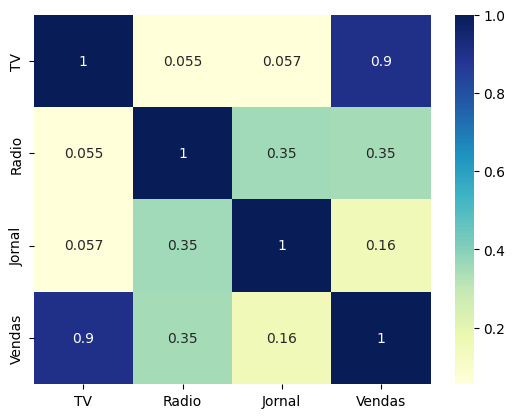

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tabela = pd.read_csv('/content/advertising.csv')

sns.heatmap(tabela.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
# criando inteligencia Artificial
#y=quem voce quer prever
y = tabela["Vendas"]

#x= quem vou usar pra prever os valores
x = tabela[["TV", "Radio","Jornal"]]

#preparando teste e treino
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

# modelo de intelegencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#criando os modelos de regressão
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

#treinando os modelos (regraão linear e arvore de decisão)
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

#calculando R² melhor modelo mais proximo de 100 e melhor
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

#mostrando resultado
print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_arvore_decisao))


0.9116540796512819
0.9561408066461553


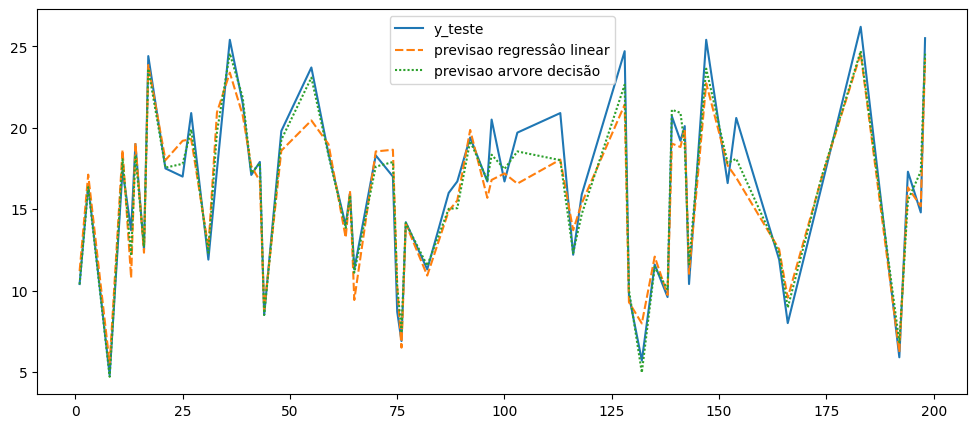

In [ ]:
# Vizualizando grafico de resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["previsao regressâo linear"] = previsao_regressao_linear
tabela_auxiliar["previsao arvore decisão"] = previsao_arvore_decisao

plt.figure(figsize=(12, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [ ]:
#Realizando previssoe de faturamento com novas previsões com novos dados
tabela_nova = pd.read_csv('/content/novos.csv')
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [ ]:
previsao = modelo_arvore_decisao.predict(tabela_nova)
print(previsao)

[ 7.685  8.988 20.026]
